In [65]:
#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_movie = pd.read_csv("./data/movie.metadata.csv")
df_movie.head()

,Wiki Movie ID,Freebase Movie ID,Movie name,Movie release date,Movie box office revenue,movie runtime,Movie language,Movie Countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,24-08-01,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,16-02-00,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [78]:
import ast

def extract_language(language_str):
    try:
        language_dict = ast.literal_eval(language_str)
        
        if "/m/02h40lc" in language_dict:
            return language_dict["/m/02h40lc"].split()[0]  # Extract the first word of the language
        elif "/m/04306rv" in language_dict:
            return language_dict["/m/04306rv"].split()[0]  # Extract the first word of the language for German
    except (ValueError, SyntaxError, KeyError):
        pass  # Handle parsing errors or missing keys gracefully
    return None

# Apply the extract_language function to the 'Language' column to create a new column 'Cleaned Language'
df_movie['Cleaned Language'] = df_movie['Movie language'].apply(extract_language)

print(df_movie['Cleaned Language'])


0        English
1        English
2           None
3        English
4         German
          ...   
81736    English
81737    English
81738    English
81739       None
81740    English
Name: Cleaned Language, Length: 81741, dtype: object


In [4]:
df_char = pd.read_csv("./data/character.metadata.csv")
df_char.head()

,Wiki Movie ID,Freebase Movie ID,Movie release date,Character Name,Actor DOB,Gender,Actor Height,Unnamed: 7,Actor Name,Actor age at movie release,Freebase character map,Unnamed: 11,Unnamed: 12
0,975900,/m/03vyhn,24-08-01,Akooshay,26-08-58,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,24-08-01,Lieutenant Melanie Ballard,15-08-74,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,24-08-01,Desolation Williams,15-06-69,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,24-08-01,Sgt Jericho Butler,12-09-67,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,24-08-01,Bashira Kincaid,25-09-77,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [42]:
## Find which actor bring in the highest revenue
# Store data about wiki movie ID, freebase movie ID, Movie name, Movie box office revenue
df_movie_revenue = df_movie[['Wiki Movie ID','Freebase Movie ID','Movie name','Movie box office revenue','Movie language', 'Movie Countries']]

# Clean data of movies without box offic revenue
df_movie_revenue = df_movie_revenue.dropna(subset=['Movie box office revenue'])
df_movie_revenue.head()

,Wiki Movie ID,Freebase Movie ID,Movie name,Movie box office revenue,Movie language,Movie Countries
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}"
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,3600000.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}"
13,171005,/m/016ywb,Henry V,10161099.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}"
17,77856,/m/0kcn7,Mary Poppins,102272727.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}"
21,612710,/m/02wjqm,New Rose Hotel,21521.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}"


In [30]:
# Store data about wiki movie ID, freebase movie ID, Movie name, Movie box office revenue
df_char_revenue = df_char[['Wiki Movie ID','Freebase Movie ID','Character Name','Actor Name','Actor age at movie release','Gender']]
df_char_revenue.head()

,Wiki Movie ID,Freebase Movie ID,Character Name,Actor Name,Actor age at movie release,Gender
0,975900,/m/03vyhn,Akooshay,Wanda De Jesus,42.0,F
1,975900,/m/03vyhn,Lieutenant Melanie Ballard,Natasha Henstridge,27.0,F
2,975900,/m/03vyhn,Desolation Williams,Ice Cube,32.0,M
3,975900,/m/03vyhn,Sgt Jericho Butler,Jason Statham,33.0,M
4,975900,/m/03vyhn,Bashira Kincaid,Clea DuVall,23.0,F


In [75]:
# This generates data on how much box office revenue is being generated by the actors in their lifetime

# Merge the two datas
df_merged = df_char_revenue.merge(df_movie_revenue, on=['Freebase Movie ID'], how='inner')

# Determine the actor and sum the box office revenue
actor_totalRevenue = df_merged.groupby(['Actor Name'])['Movie box office revenue'].agg(['sum', 'count']).reset_index()

actor_totalRevenue.columns = ['Actor Name', 'Movie box office revenue', 'Actor Count']

# Sort the actor_revenue DataFrame in descending order
actor_revenue_sort = actor_totalRevenue.sort_values(by='Movie box office revenue', ascending=False)

actor_top10 = actor_revenue_sort.head(10)

# Merge the top 10 actors with original datas
top10_actor_data = actor_top10.merge(df_char_revenue[['Actor Name', 'Gender']], on='Actor Name', how='left')
top10_actor_data = actor_top10.merge(df_merged[['Actor Name', 'Movie language']], on='Actor Name', how='left')
top10_actor_data = top10_actor_data.drop_duplicates(subset = ['Actor Name'])
top10_actor_data


,Actor Name,Movie box office revenue,Actor Count,Movie language
0,Warwick Davis,1.293016e+10,19,"{""/m/0k0sv"": ""Croatian language"", ""/m/02h40lc""..."
19,Samuel L. Jackson,1.278943e+10,72,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":..."
91,Frank Welker,1.028744e+10,61,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":..."
152,Alan Rickman,1.020871e+10,29,"{""/m/0k0sv"": ""Croatian language"", ""/m/02h40lc""..."
181,Robbie Coltrane,1.009465e+10,30,"{""/m/0k0sv"": ""Croatian language"", ""/m/02h40lc""..."
211,Conrad Vernon,9.786402e+09,17,"{""/m/02h40lc"": ""English Language""}"
228,Tom Hanks,9.623361e+09,47,"{""/m/02h40lc"": ""English Language""}"
275,Gary Oldman,9.614965e+09,36,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""..."
311,Maggie Smith,9.280352e+09,29,"{""/m/02h40lc"": ""English Language""}"
340,Hugo Weaving,8.896132e+09,24,"{""/m/02h40lc"": ""English Language""}"


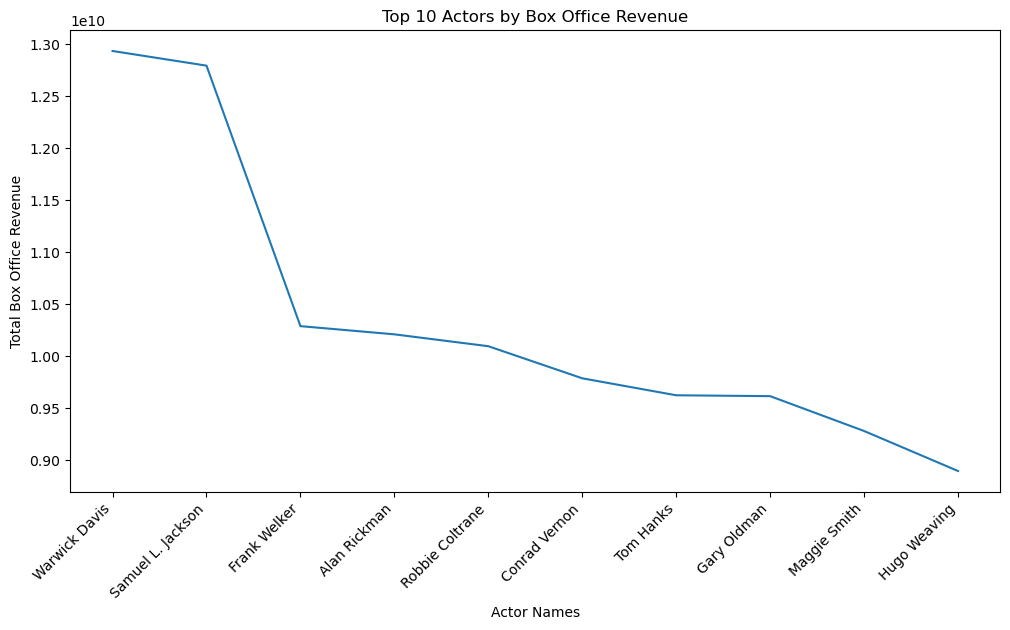

In [74]:
# Plot the data above
actor_names = top10_actor_data['Actor Name']
revenues_total = top10_actor_data['Movie box office revenue']

plt.figure(figsize=(12, 6))
plt.plot(actor_names, revenues_total)
plt.xlabel('Actor Names')
plt.ylabel('Total Box Office Revenue')
plt.title('Top 10 Actors by Box Office Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate the actor names for better readability

plt.show()